In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import io

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# loading data
file_path="Resources/FoodAccess2015CensusTractAll.csv"
foodAccess_df=pd.read_csv(file_path, index_col=False)
foodAccess_df.head()

,CensusTract,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,6001400100,Alameda,1,2937,1314,0,2,0.000681,0,0,...,2161,142,456,9,4,165,117,0,0,2.416889
1,6001400200,Alameda,1,1974,856,0,70,0.035461,0,0,...,1659,33,147,0,4,131,151,57,6,1.682202
2,6001400300,Alameda,1,4865,2418,0,40,0.008222,0,0,...,3468,518,423,5,17,434,399,354,34,1.541934
3,6001400400,Alameda,1,3703,1779,0,33,0.008912,0,0,...,2628,456,278,6,14,321,332,159,9,1.400941
4,6001400500,Alameda,1,3517,1578,0,126,0.035826,0,0,...,1905,955,209,5,27,416,340,258,72,0.652844


In [3]:
#Create DataFrame
foodAccess_2015=pd.DataFrame(foodAccess_df)

In [4]:
#copy DataFrame
new_foodAccess_df=foodAccess_2015.copy().reset_index()
new_foodAccess_df.head()

,index,CensusTract,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,0,6001400100,Alameda,1,2937,1314,0,2,0.000681,0,...,2161,142,456,9,4,165,117,0,0,2.416889
1,1,6001400200,Alameda,1,1974,856,0,70,0.035461,0,...,1659,33,147,0,4,131,151,57,6,1.682202
2,2,6001400300,Alameda,1,4865,2418,0,40,0.008222,0,...,3468,518,423,5,17,434,399,354,34,1.541934
3,3,6001400400,Alameda,1,3703,1779,0,33,0.008912,0,...,2628,456,278,6,14,321,332,159,9,1.400941
4,4,6001400500,Alameda,1,3517,1578,0,126,0.035826,0,...,1905,955,209,5,27,416,340,258,72,0.652844


In [5]:
new_foodAccess_df.columns

Index(['index', 'CensusTract', 'County', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome',
       'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1',
       'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10',
       'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
       'lapophalf', 'lalowihalf', 'lawhitehalf', 'lablackhalf', 'laasianhalf',
       'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf',
       'lahunvhalf', 'lasnaphalf', 'lapop1', 'lalowi1', 'lawhite1', 'lablack1',
       'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 'lahisp1', 'lahunv1',
       'lasnap1', 'lapop10', 'lalowi10', 'lawhite10', 'lablack10', 'laasian10',
       'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10',
       'lasnap10', 'lapop20'

<IPython.core.display.Javascript object>


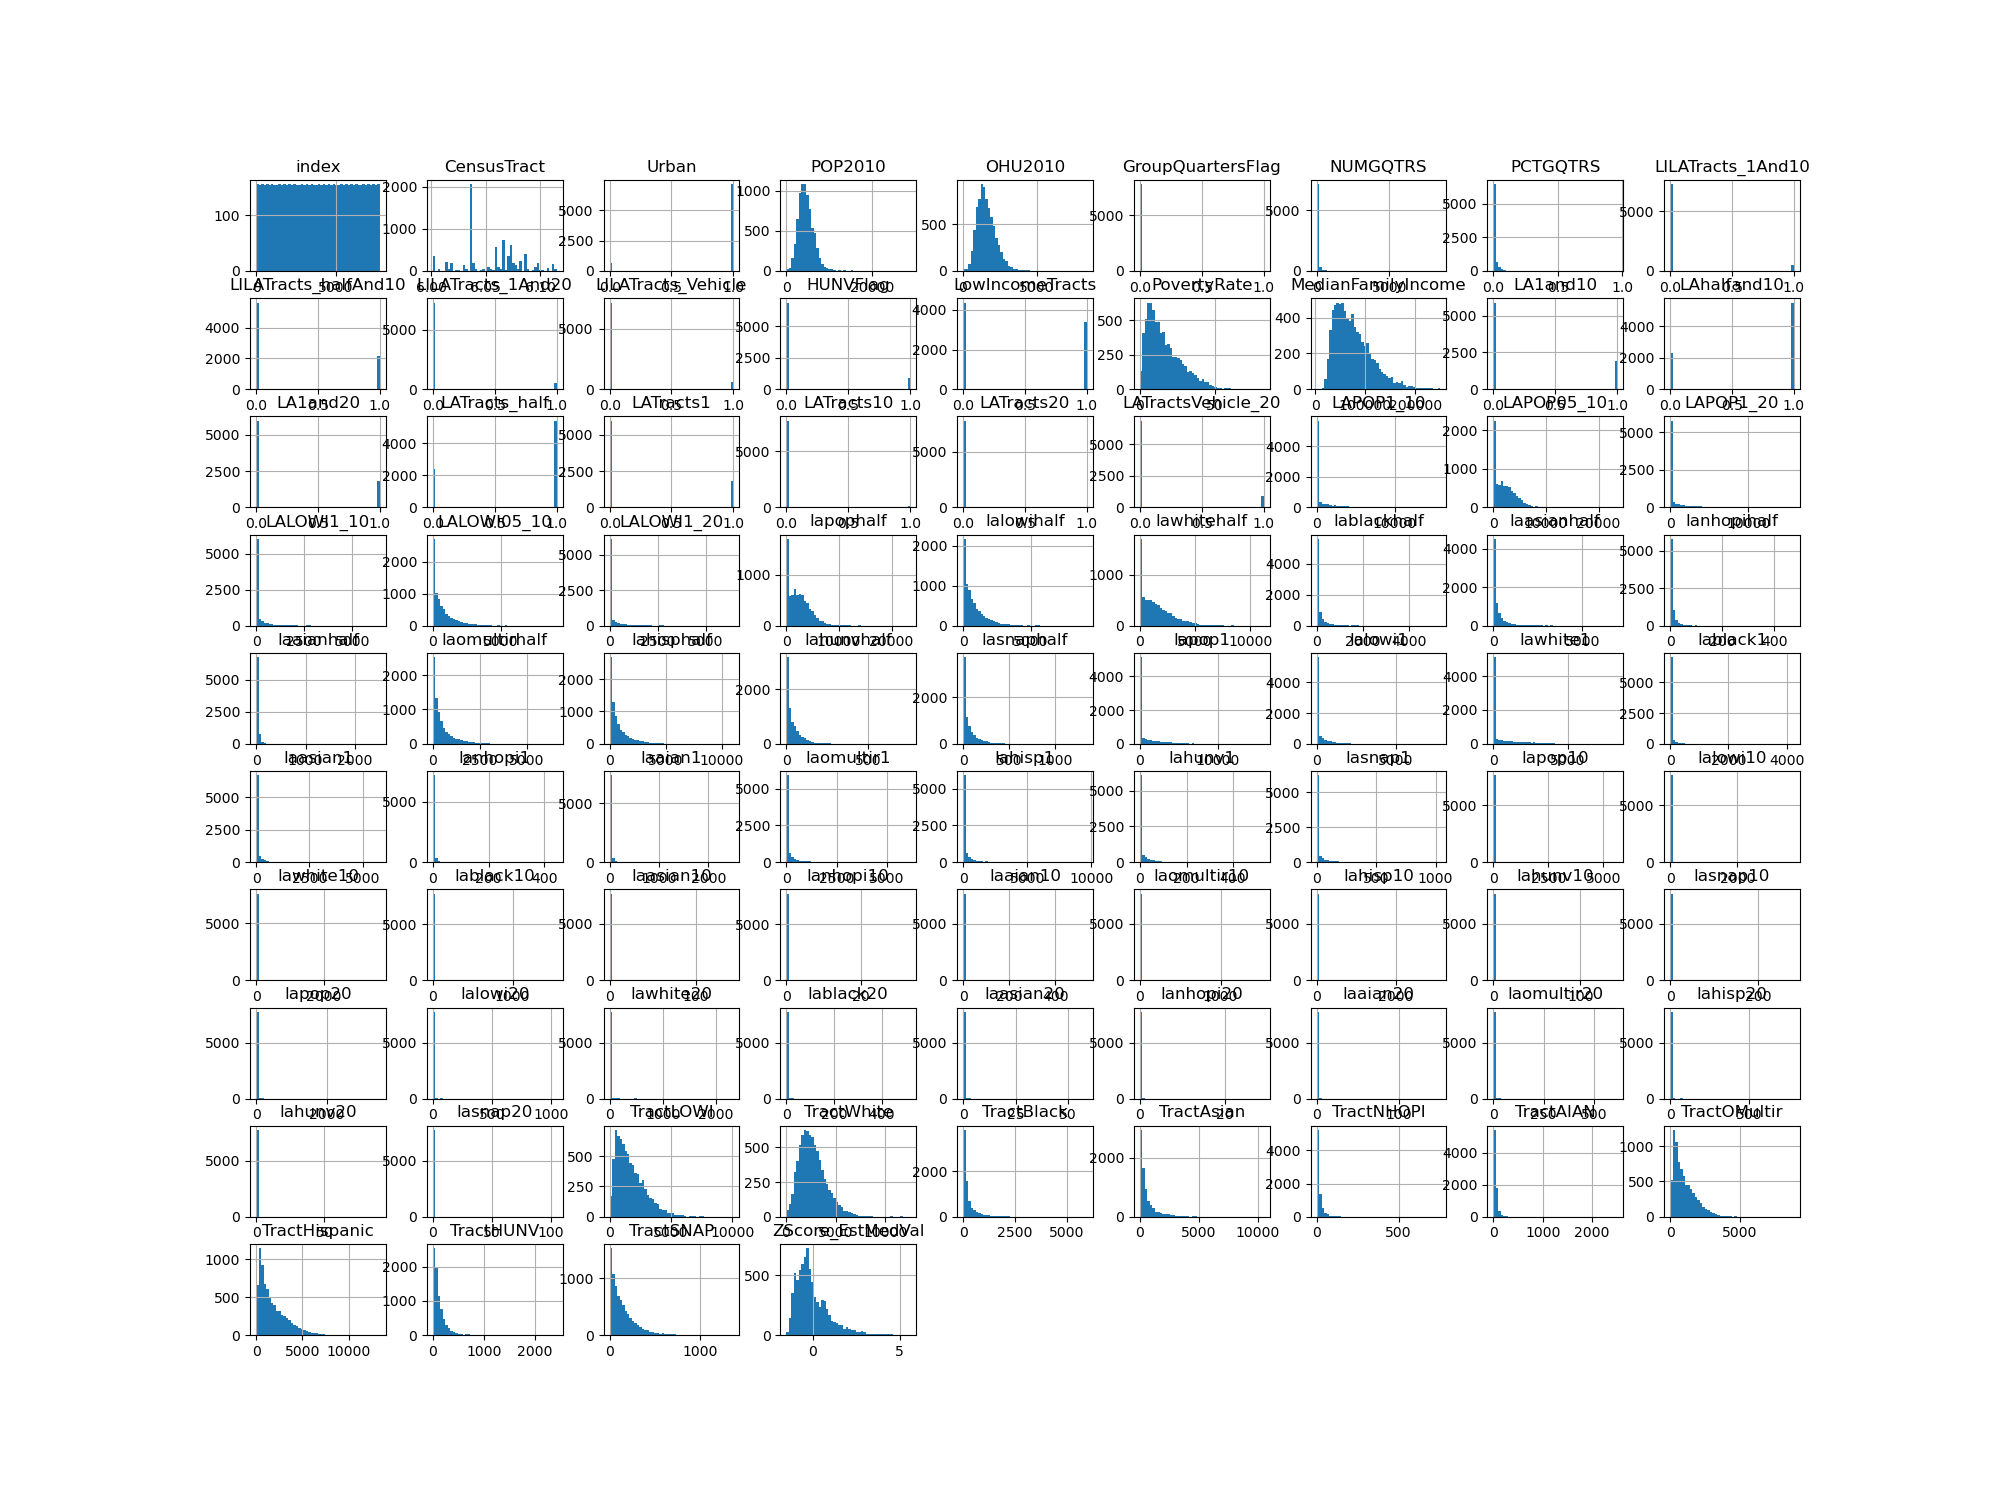

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
new_foodAccess_df.hist(bins=50, figsize=(20,15))
plt.show()


In [6]:
## method1 Simple Statistical linear regression model
import statsmodels.formula.api as sm

In [7]:
# Fitting the OLS on data
model = sm.ols('ZScore_EstMedVal ~ Urban+ POP2010+ OHU2010+ GroupQuartersFlag+ NUMGQTRS+ PCTGQTRS + LILATracts_1And10 + LILATracts_halfAnd10+ LILATracts_1And20+ LILATracts_Vehicle+ HUNVFlag   + LowIncomeTracts+ PovertyRate+ MedianFamilyIncome+ LA1and10+ LAhalfand10+ LA1and20+ LATracts_half + LATracts1+ LATracts10+ LATracts20+ LATractsVehicle_20+ LAPOP1_10+ LAPOP05_10+ LAPOP1_20+ LALOWI1_10+ LALOWI05_10+ LALOWI1_20+  lapophalf+ lalowihalf+ lawhitehalf+ lablackhalf+ laasianhalf+ lanhopihalf+ laaianhalf+ laomultirhalf+ lahisphalf+ lahunvhalf+ lasnaphalf+ lapop1+ lalowi1+ lawhite1+ lablack1+ laasian1+ lanhopi1+ laaian1+ laomultir1+ lahisp1+ lahunv1+ lasnap1+ lapop10+ lalowi10+ lawhite10+ lablack10+ laasian10+ lanhopi10+ laaian10+ laomultir10+ lahisp10+ lahunv10+ lasnap10+ lapop20+ lalowi20+ lawhite20+ lablack20+ laasian20+ lanhopi20+ laaian20+ laomultir20+ lahisp20+ lahunv20+ lasnap20+ TractLOWI+ TractWhite+ TractBlack+ TractAsian+ TractNHOPI+ TractAIAN+ TractOMultir+ TractHispanic+ TractHUNV+ TractSNAP', new_foodAccess_df).fit()
print(model.params)

Intercept           -2.099756
Urban                0.323893
POP2010              0.222099
OHU2010              0.000273
GroupQuartersFlag    0.039725
                       ...   
TractAIAN           -0.224965
TractOMultir        -0.222134
TractHispanic        0.000008
TractHUNV            0.000603
TractSNAP           -0.001154
Length: 83, dtype: float64


In [8]:
print(model.summary2())

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.690     
Dependent Variable:        ZScore_EstMedVal      AIC:                     13024.4033
Date:                      2022-06-02 18:50      BIC:                     13574.1178
No. Observations:          7773                  Log-Likelihood:          -6433.2   
Df Model:                  78                    F-statistic:             223.2     
Df Residuals:              7694                  Prob (F-statistic):      0.00      
R-squared:                 0.694                 Scale:                   0.30963   
------------------------------------------------------------------------------------
                        Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept                -2.0998     0.0597 -35.1570 0.0000      -2.2168     -1.9827
Urban  

In [10]:
result=model.summary2()
result

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.690     
Dependent Variable:        ZScore_EstMedVal      AIC:                     13024.4033
Date:                      2022-06-02 18:51      BIC:                     13574.1178
No. Observations:          7773                  Log-Likelihood:          -6433.2   
Df Model:                  78                    F-statistic:             223.2     
Df Residuals:              7694                  Prob (F-statistic):      0.00      
R-squared:                 0.694                 Scale:                   0.30963   
------------------------------------------------------------------------------------
                        Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept                -2.0998     0.0597 -35.1570 0.0000      -2.2168     -1.9827
Urban                     0.3239     0.0536   6.0393 0.0000       0.2188      0.4290
POP2010                   0.2221     0.2753   0.8067 0.4199      -0.3176      0.7618
OHU2010                   0.0003     0.0000   7.9696 0.0000       0.0002      0.0003
GroupQuartersFlag         0.0397     0.1895   0.2096 0.8340      -0.3318      0.4113
NUMGQTRS                  0.0001     0.0000   1.9454 0.0518      -0.0000      0.0002
PCTGQTRS                  0.3096     0.2372   1.3053 0.1918      -0.1554      0.7747
LILATracts_1And10         0.1920     0.1665   1.1533 0.2488      -0.1344      0.5184
LILATracts_halfAnd10      0.0047     0.0356   0.1323 0.8948      -0.0651      0.0745
LILATracts_1And20        -0.2266     0.1695  -1.3369 0.1813      -0.5589      0.1057
LILATracts_Vehicle        0.0384     0.0450   0.8529 0.3937      -0.0499      0.1267
HUNVFlag                 -1.0187     1.6783  -0.6070 0.5439      -4.3086      2.2712
LowIncomeTracts           0.1564     0.0320   4.8837 0.0000       0.0936      0.2192
PovertyRate               0.0063     0.0011   5.6167 0.0000       0.0041      0.0085
MedianFamilyIncome        0.0000     0.0000  78.7994 0.0000       0.0000      0.0000
LA1and10                 -0.0888     0.2328  -0.3815 0.7028      -0.5452      0.3675
LAhalfand10              -0.0744     0.0871  -0.8538 0.3932      -0.2452      0.0964
LA1and20                 -0.4240     0.6271  -0.6761 0.4990      -1.6532      0.8053
LATracts_half            -0.1179     0.0877  -1.3436 0.1791      -0.2899      0.0541
LATracts1                 0.4201     0.5749   0.7309 0.4649      -0.7067      1.5470
LATracts10                0.0349     0.1673   0.2086 0.8347      -0.2930      0.3628
LATracts20               -0.6590     1.0336  -0.6375 0.5238      -2.6852      1.3673
LATractsVehicle_20        0.9542     1.6788   0.5684 0.5698      -2.3368      4.2452
LAPOP1_10                 0.0043     0.0020   2.1534 0.0313       0.0004      0.0082
LAPOP05_10                0.0000     0.0000   0.4684 0.6395      -0.0001      0.0001
LAPOP1_20                -0.0044     0.0020  -2.1882 0.0287      -0.0083     -0.0005
LALOWI1_10               -0.0083     0.0050  -1.6556 0.0979      -0.0181      0.0015
LALOWI05_10              -0.0000     0.0001  -0.2015 0.8403      -0.0002      0.0002
LALOWI1_20                0.0084     0.0050   1.6778 0.0934      -0.0014      0.0182
lapophalf                35.0261   469.0223   0.0747 0.9405    -884.3853    954.4375
lalowihalf                0.0001     0.0001   0.6647 0.5062      -0.0001      0.0003
lawhitehalf             -35.0262   469.0223  -0.0747 0.9405    -954.4376    884.3852
lablackhalf             -35.0261   469.0223  -0.0747 0.9405    -954.4375    884.3853
laasianhalf             -35.0261   469.0223  -0.0747 0.9405    -954.4375    884.3853
lanhopihalf             -35.0255   469.0223  -0.0747 0.9405    -954.

In [10]:
##Chose significant values
model2 = sm.ols('ZScore_EstMedVal ~ Urban+  OHU2010+  NUMGQTRS+   LowIncomeTracts+ PovertyRate+ MedianFamilyIncome+  LAPOP1_10+ LAPOP1_20+ LALOWI1_10+ LALOWI1_20+lahunvhalf+  lahunv1+  lalowi10+  TractLOWI+ TractHUNV+ TractSNAP', new_foodAccess_df).fit()
print(model2.params)

Intercept            -2.186805
Urban                 0.164787
OHU2010               0.000008
NUMGQTRS             -0.000003
LowIncomeTracts       0.189825
PovertyRate           0.010965
MedianFamilyIncome    0.000024
LAPOP1_10            -0.000130
LAPOP1_20             0.000036
LALOWI1_10            0.000531
LALOWI1_20           -0.000455
lahunvhalf           -0.000608
lahunv1              -0.000068
lalowi10             -0.000375
TractLOWI             0.000075
TractHUNV             0.001167
TractSNAP            -0.001767
dtype: float64


In [11]:
#stewise regression for chosing related variables & better way using regression model
x_columns=['Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome',
       'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1',
       'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10',
       'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
       'lapophalf', 'lalowihalf', 'lawhitehalf', 'lablackhalf', 'laasianhalf',
       'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf',
       'lahunvhalf', 'lasnaphalf', 'lapop1', 'lalowi1', 'lawhite1', 'lablack1',
       'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 'lahisp1', 'lahunv1',
       'lasnap1', 'lapop10', 'lalowi10', 'lawhite10', 'lablack10', 'laasian10',
       'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10',
       'lasnap10', 'lapop20', 'lalowi20', 'lawhite20', 'lablack20',
       'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20',
       'lahunv20', 'lasnap20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP']

In [12]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       2.416889
1       1.682202
2       1.541934
3       1.400941
4       0.652844
          ...   
7768   -0.856036
7769   -0.910041
7770   -0.842263
7771   -0.553752
7772   -0.955347
Name: ZScore_EstMedVal, Length: 7773, dtype: float64

In [13]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = new_foodAccess_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              178.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:46   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7695   BIC:                                  1.472e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [14]:
# loop through model testing
x_columns.remove("POP2010")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              178.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:47   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7695   BIC:                                  1.472e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
x_columns.remove("GroupQuartersFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              181.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:47   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7696   BIC:                                  1.471e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
x_columns.remove("PCTGQTRS")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              183.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:48   Log-Likelihood:                         -7013.1
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7697   BIC:                                  1.471e+04
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
x_columns.remove("LILATracts_1And10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              185.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:49   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7698   BIC:                                  1.470e+04
Df Model:                          75                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [18]:
x_columns.remove("LILATracts_1And20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              188.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:50   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7699   BIC:                                  1.469e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
x_columns.remove("HUNVFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:51   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [20]:
x_columns.remove("LA1and10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:51   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [21]:
x_columns.remove("LA1and20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:52   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [22]:
x_columns.remove("LAhalfand10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [23]:
x_columns.remove("LATracts20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              193.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:53   Log-Likelihood:                         -7014.5
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7701   BIC:                                  1.467e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [24]:
x_columns.remove("LATractsVehicle_20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              196.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:57   Log-Likelihood:                         -7014.6
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7702   BIC:                                  1.467e+04
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [25]:
x_columns.remove("LAPOP1_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              199.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:57   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7703   BIC:                                  1.466e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [26]:
x_columns.remove("LAPOP1_20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              201.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:58   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7704   BIC:                                  1.465e+04
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [27]:
x_columns.remove("LALOWI1_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              204.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:59   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7705   BIC:                                  1.464e+04
Df Model:                          68                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [28]:
x_columns.remove("LALOWI05_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              208.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:10:59   Log-Likelihood:                         -7016.1
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7706   BIC:                                  1.463e+04
Df Model:                          67                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [29]:
x_columns.remove("lapophalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              211.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:00   Log-Likelihood:                         -7016.1
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7707   BIC:                                  1.462e+04
Df Model:                          66                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [30]:
x_columns.remove("lalowihalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              214.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:00   Log-Likelihood:                         -7016.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7708   BIC:                                  1.461e+04
Df Model:                          65                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [31]:
x_columns.remove("lanhopihalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              217.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:01   Log-Likelihood:                         -7016.3
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7709   BIC:                                  1.461e+04
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [32]:
x_columns.remove("laaianhalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              221.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:01   Log-Likelihood:                         -7017.1
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7710   BIC:                                  1.460e+04
Df Model:                          63                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [33]:
x_columns.remove("lahisphalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              224.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:02   Log-Likelihood:                         -7017.6
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7711   BIC:                                  1.459e+04
Df Model:                          62                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [34]:
x_columns.remove("lasnaphalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              228.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:02   Log-Likelihood:                         -7018.8
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7712   BIC:                                  1.458e+04
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [35]:
x_columns.remove("lahunvhalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              232.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:06   Log-Likelihood:                         -7019.7
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7713   BIC:                                  1.458e+04
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [36]:
x_columns.remove("lapop1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              236.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:07   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7714   BIC:                                  1.457e+04
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [37]:
x_columns.remove("lalowi1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              240.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:08   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7715   BIC:                                  1.456e+04
Df Model:                          58                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [38]:
x_columns.remove("lablack1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              244.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:08   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7716   BIC:                                  1.455e+04
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [39]:
x_columns.remove("laasian1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              248.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:09   Log-Likelihood:                         -7020.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7717   BIC:                                  1.454e+04
Df Model:                          56                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [40]:
x_columns.remove("laomultir1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              253.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:10   Log-Likelihood:                         -7020.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7718   BIC:                                  1.453e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [41]:
x_columns.remove("lasnap1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              258.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:11   Log-Likelihood:                         -7021.1
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7719   BIC:                                  1.453e+04
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [42]:
x_columns.remove("lapop10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              262.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:11   Log-Likelihood:                         -7021.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7720   BIC:                                  1.452e+04
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [43]:
x_columns.remove("lalowi10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              267.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:12   Log-Likelihood:                         -7022.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7721   BIC:                                  1.451e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [44]:
x_columns.remove("lawhite10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              273.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:12   Log-Likelihood:                         -7022.7
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7722   BIC:                                  1.450e+04
Df Model:                          51                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [45]:
x_columns.remove("lablack10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              278.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:13   Log-Likelihood:                         -7023.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7723   BIC:                                  1.449e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [46]:
x_columns.remove("laasian10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              284.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:14   Log-Likelihood:                         -7023.9
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7724   BIC:                                  1.449e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [47]:
x_columns.remove("lanhopi10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              290.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:18   Log-Likelihood:                         -7025.0
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7725   BIC:                                  1.448e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [48]:
x_columns.remove("laaian10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              296.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:19   Log-Likelihood:                         -7025.1
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7726   BIC:                                  1.447e+04
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [49]:
x_columns.remove("laomultir10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              302.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:21   Log-Likelihood:                         -7026.0
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7727   BIC:                                  1.446e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [50]:
x_columns.remove("lahisp10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              309.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:22   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7728   BIC:                                  1.446e+04
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [51]:
x_columns.remove("lasnap10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              316.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:23   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7729   BIC:                                  1.445e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [52]:
x_columns.remove("lapop20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              323.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:23   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7730   BIC:                                  1.444e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [53]:
x_columns.remove("lalowi20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              331.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:24   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7731   BIC:                                  1.443e+04
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [54]:
x_columns.remove("lawhite20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              339.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:25   Log-Likelihood:                         -7027.3
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7732   BIC:                                  1.442e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [55]:
x_columns.remove("lablack20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              347.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:25   Log-Likelihood:                         -7028.1
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7733   BIC:                                  1.441e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [56]:
x_columns.remove("laasian20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              356.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:26   Log-Likelihood:                         -7028.4
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7734   BIC:                                  1.441e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [57]:
x_columns.remove("lanhopi20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              366.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:26   Log-Likelihood:                         -7028.9
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7735   BIC:                                  1.440e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [58]:
x_columns.remove("laomultir20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              376.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:27   Log-Likelihood:                         -7028.9
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7736   BIC:                                  1.439e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [59]:
x_columns.remove("lahisp20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              386.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:28   Log-Likelihood:                         -7029.5
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7737   BIC:                                  1.438e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [60]:
x_columns.remove("TractOMultir")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              397.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:11:28   Log-Likelihood:                         -7029.7
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7738   BIC:                                  1.437e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [61]:
clean_foodAccess_df=new_foodAccess_df.filter(['Urban', 'POP2010', 'OHU2010','NUMGQTRS', 'LILATracts_halfAnd10', 'LILATracts_Vehicle', 
       'LowIncomeTracts',  'PovertyRate', 'MedianFamilyIncome','LATracts_half', 'LATracts1', 'LATracts10', 
       'LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'lahunv1','lahunv10', 'laasian20', 'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'], axis=1)
clean_foodAccess_df

,Urban,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LATracts_half,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,2,0,0,0,5.0,230139,1,...,173,2161,142,456,9,4,117,0,0,2.416889
1,1,1974,856,70,0,0,0,4.0,181016,0,...,161,1659,33,147,0,4,151,57,6,1.682202
2,1,4865,2418,40,0,0,0,8.6,136250,0,...,781,3468,518,423,5,17,399,354,34,1.541934
3,1,3703,1779,33,0,0,0,7.2,109861,0,...,672,2628,456,278,6,14,332,159,9,1.400941
4,1,3517,1578,126,0,0,0,15.1,102083,1,...,924,1905,955,209,5,27,340,258,72,0.652844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,0,10879,3320,6,0,0,0,7.9,66913,0,...,3749,7103,565,856,103,157,2759,124,81,-0.856036
7769,0,4233,1492,4,0,0,0,17.6,66416,0,...,1285,3289,44,213,5,77,713,118,227,-0.910041
7770,0,2783,968,12,0,0,0,17.7,57237,0,...,1421,1997,31,297,2,75,476,41,140,-0.842263
7771,0,7357,2802,0,0,0,0,11.6,73351,0,...,1889,6179,57,181,9,156,916,56,261,-0.553752


In [62]:
clean_foodAccess_df.dtypes

Urban                     int64
POP2010                   int64
OHU2010                   int64
NUMGQTRS                  int64
LILATracts_halfAnd10      int64
LILATracts_Vehicle        int64
LowIncomeTracts           int64
PovertyRate             float64
MedianFamilyIncome        int64
LATracts_half             int64
LATracts1                 int64
LATracts10                int64
LAPOP05_10              float64
lawhitehalf             float64
lablackhalf             float64
laasianhalf             float64
laomultirhalf           float64
lawhite1                float64
lanhopi1                float64
laaian1                 float64
lahisp1                 float64
lahunv1                 float64
lahunv10                float64
laasian20               float64
lahunv20                float64
lasnap20                float64
TractLOWI                 int64
TractWhite                int64
TractBlack                int64
TractAsian                int64
TractNHOPI                int64
TractAIA

<IPython.core.display.Javascript object>


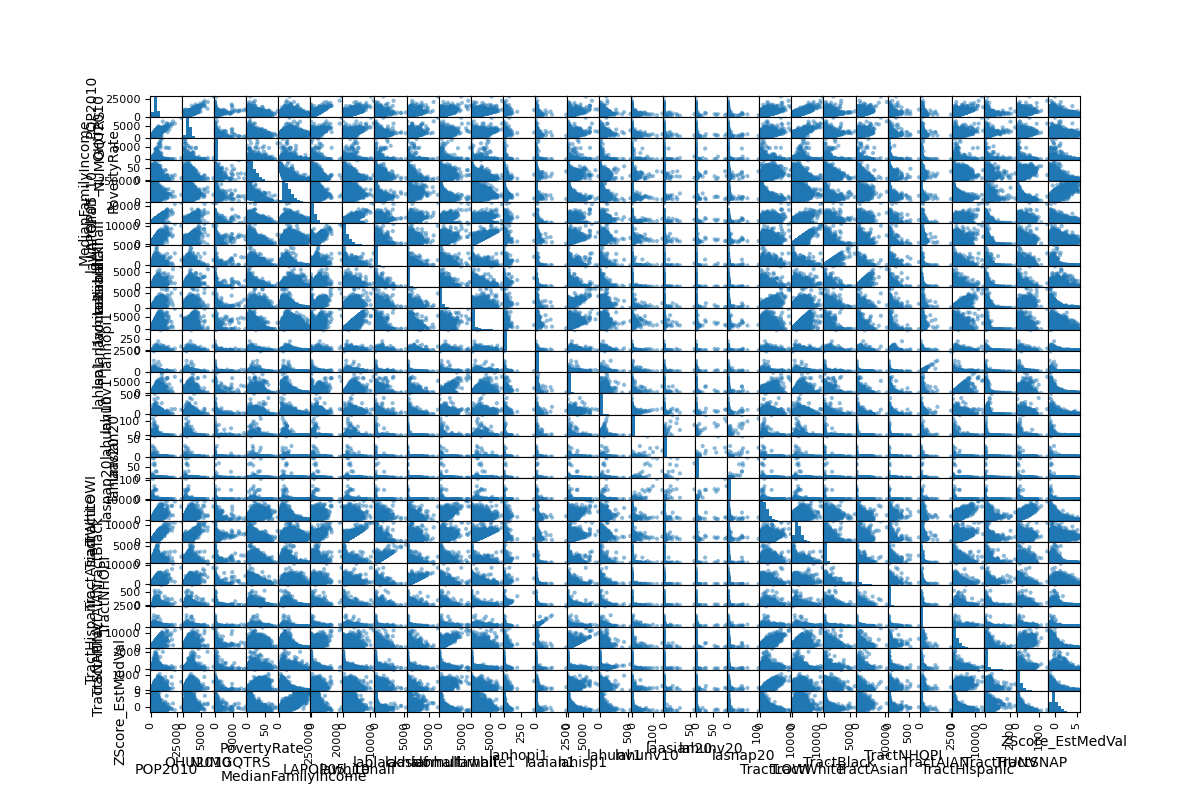

array([[<AxesSubplot:xlabel='POP2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='POP2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='POP2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='POP2010'>,
        <AxesSubplot:xlabel='LAPOP05_10', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laomultirhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lawhite1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lanhopi1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laaian1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahisp1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahunv1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laa

In [63]:
from pandas.plotting import scatter_matrix
colist=clean_foodAccess_df.filter(['POP2010', 'OHU2010','NUMGQTRS','PovertyRate', 'MedianFamilyIncome', 
       'LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'lahunv1','lahunv10', 'laasian20', 'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

In [64]:
colist2=clean_foodAccess_df.filter(['Urban','LILATracts_halfAnd10', 'LILATracts_Vehicle', 'LowIncomeTracts','LATracts_half', 'LATracts1', 'LATracts10','ZScore_EstMedVal'], axis=1)
attributes = list(colist2)

plt.show()

In [65]:
import os  
os.makedirs('Resources/', exist_ok=True)  
clean_foodAccess_df.to_csv('Resources/FoodAccess2015HousingPrice_All.csv', index=False)  

In [66]:
filepath='Resources/FoodAccess2015HousingPrice_All.csv'
clean_foodAccess_df=pd.read_csv(filepath)
clean_foodAccess_df.head()

,Urban,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LATracts_half,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,2,0,0,0,5.0,230139,1,...,173,2161,142,456,9,4,117,0,0,2.416889
1,1,1974,856,70,0,0,0,4.0,181016,0,...,161,1659,33,147,0,4,151,57,6,1.682202
2,1,4865,2418,40,0,0,0,8.6,136250,0,...,781,3468,518,423,5,17,399,354,34,1.541934
3,1,3703,1779,33,0,0,0,7.2,109861,0,...,672,2628,456,278,6,14,332,159,9,1.400941
4,1,3517,1578,126,0,0,0,15.1,102083,1,...,924,1905,955,209,5,27,340,258,72,0.652844


<IPython.core.display.Javascript object>


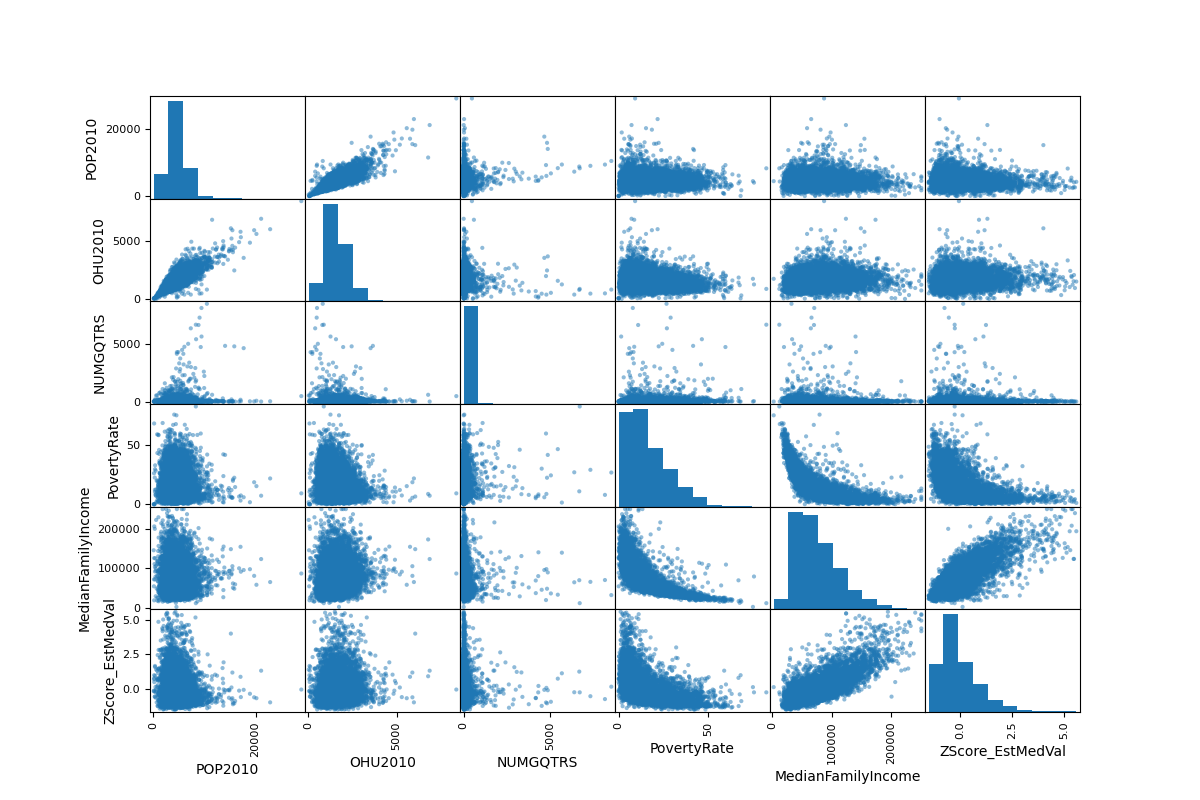

array([[<AxesSubplot:xlabel='POP2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='POP2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='POP2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='POP2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='POP2010'>],
       [<AxesSubplot:xlabel='POP2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='OHU2010'>],
       [<AxesSubplot:xlabel='POP2010', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='NUMGQTRS'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='NUMGQTRS'>,
        <Ax

In [67]:
from pandas.plotting import scatter_matrix
colist=clean_foodAccess_df.filter(['POP2010', 'OHU2010','NUMGQTRS','PovertyRate', 'MedianFamilyIncome','ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


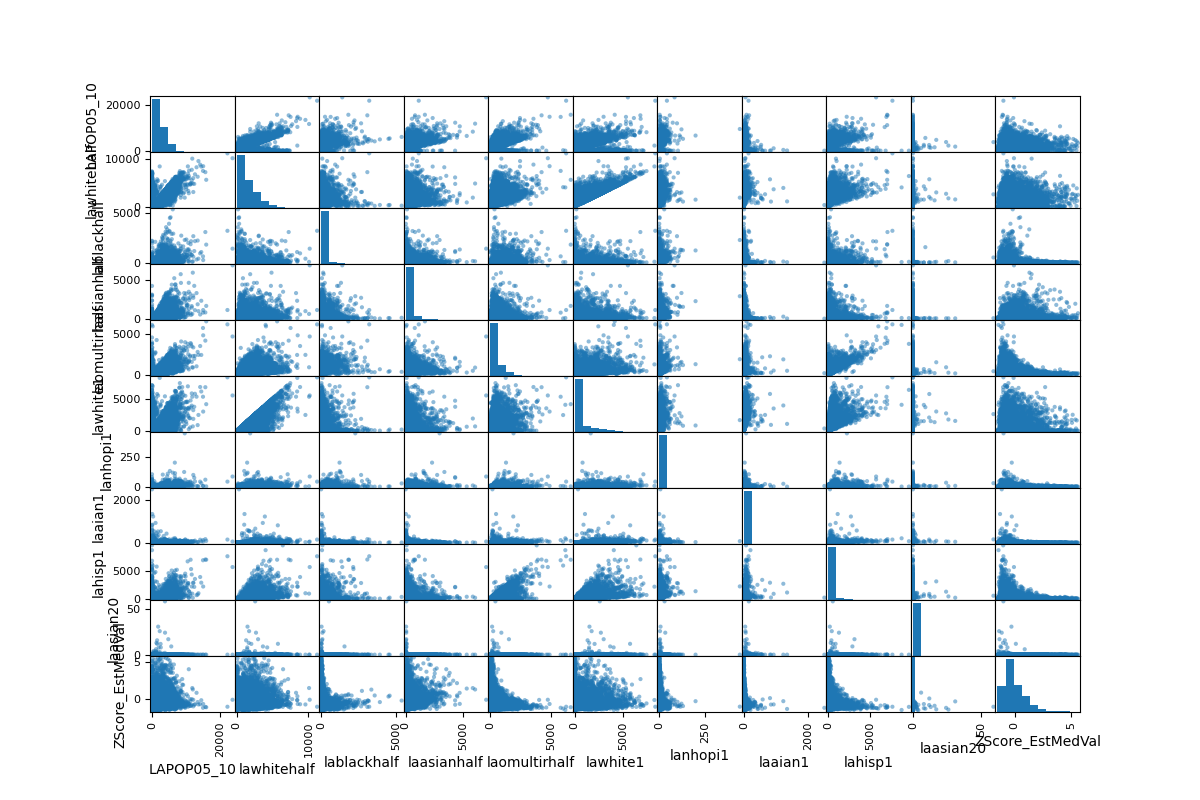

array([[<AxesSubplot:xlabel='LAPOP05_10', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laomultirhalf', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lawhite1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lanhopi1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laaian1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='lahisp1', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='laasian20', ylabel='LAPOP05_10'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LAPOP05_10'>],
       [<AxesSubplot:xlabel='LAPOP05_10', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='lawhitehalf'>,
        <AxesSubplot:xlabel='la

In [68]:
colist=clean_foodAccess_df.filter(['LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'laasian20',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


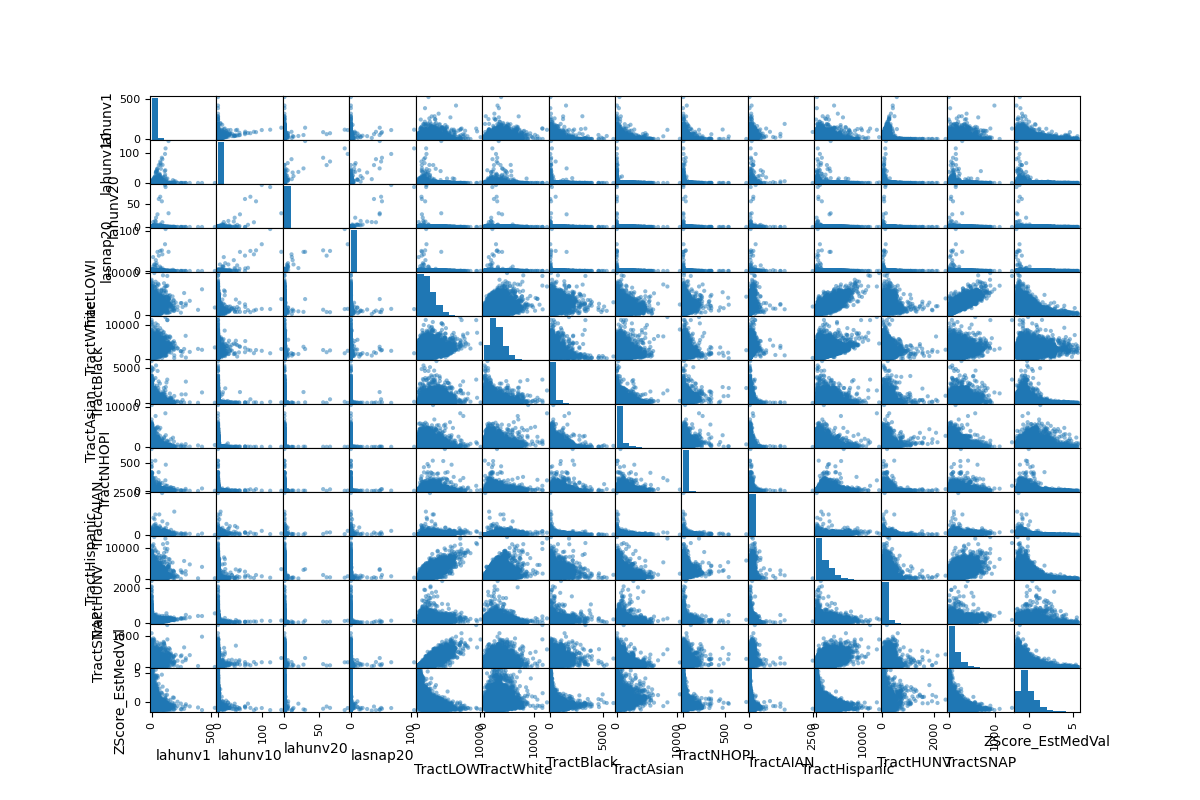

array([[<AxesSubplot:xlabel='lahunv1', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lahunv20', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='lasnap20', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractLOWI', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractNHOPI', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractAIAN', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractHispanic', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractHUNV', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='TractSNAP', ylabel='lahunv1'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='lahunv1'>],
       [<AxesSubplot:xlabel='lahunv1', ylabel='lahunv10'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='lahunv10'>,
        <AxesSubplot:xlabel='l

In [69]:
colist=clean_foodAccess_df.filter(['lahunv1','lahunv10',  'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))